#  Hypothesis Testing

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('grades.csv')

In [8]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


A hypothesis is a statement that we can test. I'll pull an example from my own research area of educational technology and learning analytics. Let's say that we have an expectation that when a new course is launched on a MOOC platform, the keenest students find out about it and all flock to it. Thus, we might expect that those students who sign up quite quickly after the course is launched will have higher performance than those students who signed up after the MOOC has been around for a while. In this example, we have samples from two different groups which we want to compare. The early sign ups and the late sign ups. 

I segmented this population into two pieces. Those who finish the first assignment by the end of December 2015 and those who finish it sometimes after that. 

In [9]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

Note that the datetime values are ignored as panda's knows this isn't a number, but an object type.

In [10]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [11]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

If we look at the mean values for the late DataFrame as well, we get surprisingly similar numbers. There are slight differences, though. It looks like the end of the six assignments, the early users are doing better by about a percentage point. 

When we do hypothesis testing, we hold out that our hypothesis as the alternative and we create a second hypothesis called the null hypothesis.  


Null = there is no difference between groups. 

In [16]:
from scipy import stats
stats.ttest_ind?

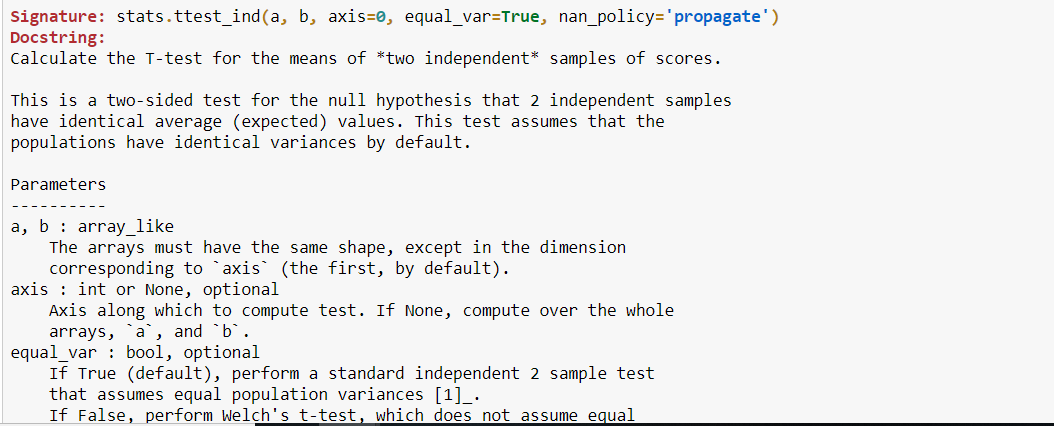

When doing hypothesis testing, we have to choose a significance level as a threshold for how much of a chance we're willing to accept. This significance level is typically called alpha. It can vary greatly, depending on what you're going to do with the result and the amount of noise you expect in your data. For instance, in social sciences research, a value of 0.05 or 0.01 is often used, which indicates a tolerance for a probability of between 5% and 1% of chance. In a physics experiment where the conditions are much more controlled and thus, the burden of proof is much higher, you might expect to see alpha levels of 10 to the negative 5 or 100,000th of a percentage. 

You can think of the significance level from the perspective of interventions as well and this is something I run into regularly with my research. What am I going to do when I find out that two student populations are different? For instance, if I'm going to send an email nudge to encourage students to continue working on their homework, that's a pretty low-cost intervention. Emails are cheap and while I certainly don't want to annoy students, one extra email isn't going to ruin their day. But what if the intervention is a little more involved, like having our tutorial assistant followup with a student via phone? This is all of a sudden much more expensive for both the institution and for the student. So, I might want to ensure a higher burden of proof. 

So the threshold you set for alpha depends on what you might do with the result, as well. For this example, let's use a threshold of 0.05 for our alpha or 5%. Now, how do we actually test whether these means are different in Python? The SciPy library contains a number of different statistical tests and forms a basis for hypothesis testing in Python. A t-test is one way to compare the means of two different populations. In the SciPy library, the ttest_ind function will compare two independent samples to see if they have different means.

### But I do want to note that most statistical tests expect that the data conforms to a certain distribution, a shape. So, you shouldn't apply such tests blindly and should investigate your data first.###

If we want to compare the assignment grades for the first assignment between the two populations, we could generate a t-test by passing these two series into the ttest_ind function. The p-value here is much larger than our 0.05. So we cannot reject the null hypothesis, which is that the two populations are the same. In more lay terms, we would say that there's no statistically significant difference between these two sample means.  

In [13]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

Let's check with assignment two grade. No, that's much larger than 0.05 too. 

In [14]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

How about with assignment three? Well, that's much closer, but still beyond our threshold value. It's important to stop here and talk about serious process problem with how we're handling this investigation of the difference between these two populations. When we set the alpha to be 0.05, we're saying that we expect it that there will be positive result, 5% of the time just due to chance. 

In [15]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [22]:
![phacking.jpeg](attachment:phacking.jpeg)


'[phacking.jpeg]' is not recognized as an internal or external command,
operable program or batch file.


As we run more and more t-tests, we're more likely to find a positive result just because of the number of t-tests we have run. 
When a data scientist runs many tests in this way, it's called p-hacking or dredging and it's a serious methodological issue. P-hacking results in spurious correlations instead of generalizable results. There are a couple of different ways you can deal with p-hacking. The first is called the Bonferroni correction. In this case, you simply tighten your alpha value, the threshold of significance, based on the number of tests you're running. So if you choose 0.05 with 1 test, and you want to run 3 tests, you reduce alpha by multiplying 0.05 by one-third to get a new value of 0.017. I personally find this approach to be very conservative. Another option is to hold out some of your data for testing to see how generalizable your result is. In this case, we might take half of our data for each of the two DataFrames, run our t-test with that, form specific hypothesis based on the result of these tests, then run very limited tests on the rest of the data.This method is actually heavily used in machine learning when building predictive models, where it's called cross fold validation  

A final method which has come about is the pre-registration of your experiment. In this step, you would outline what you expect to find and why, and describe the test that would backup a positive proof of this. You register it with a third party, in academic circles, this is often a journal who determines whether it's a reasonable test to run or not.


In Scipy, there are different tests used, depending on the shape of your data, and different ways to report results instead of just p-values, such as confidence intervals. 